In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
data.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [10]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
list(data)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

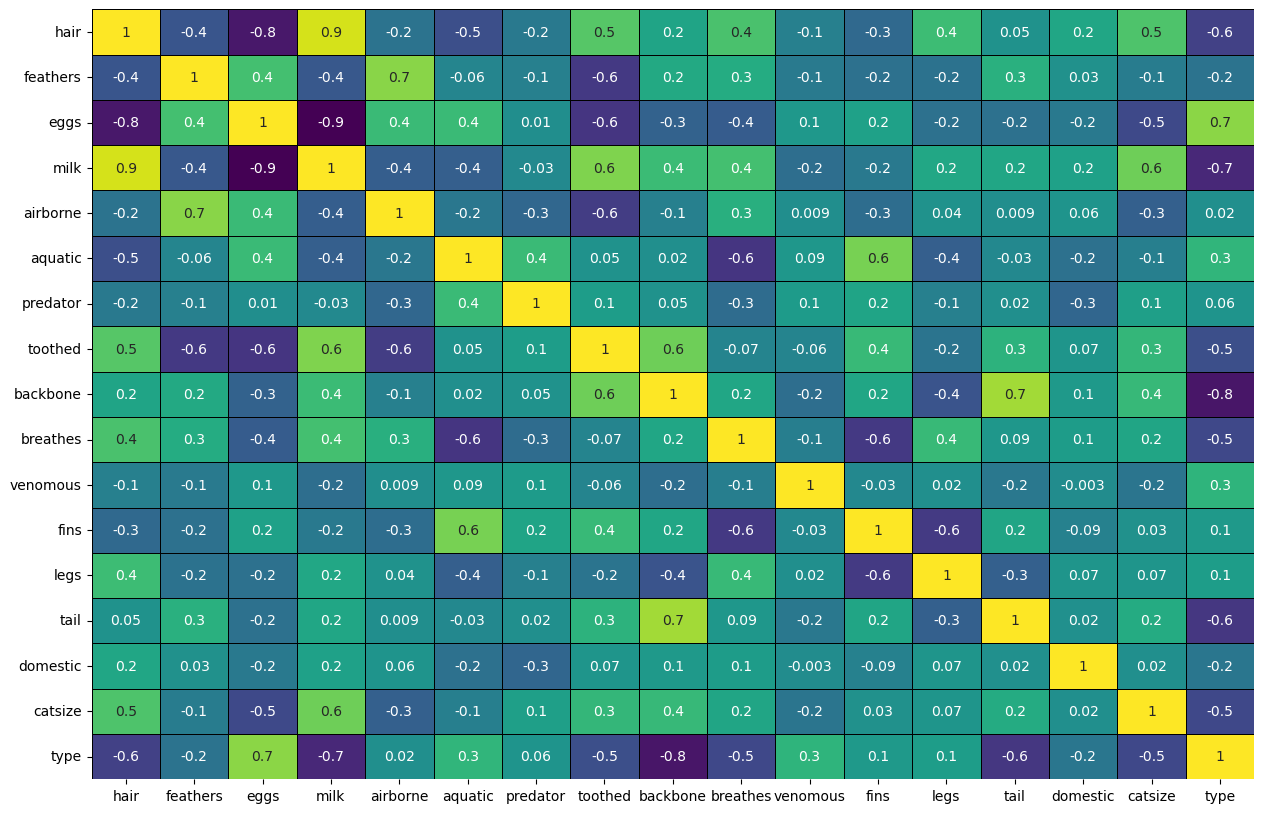

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot = True,fmt = '.1g',cmap = 'viridis',cbar = False,linewidths=0.5,linecolor='black');

Text(0.5, 1.0, 'Featues fot the Animals')

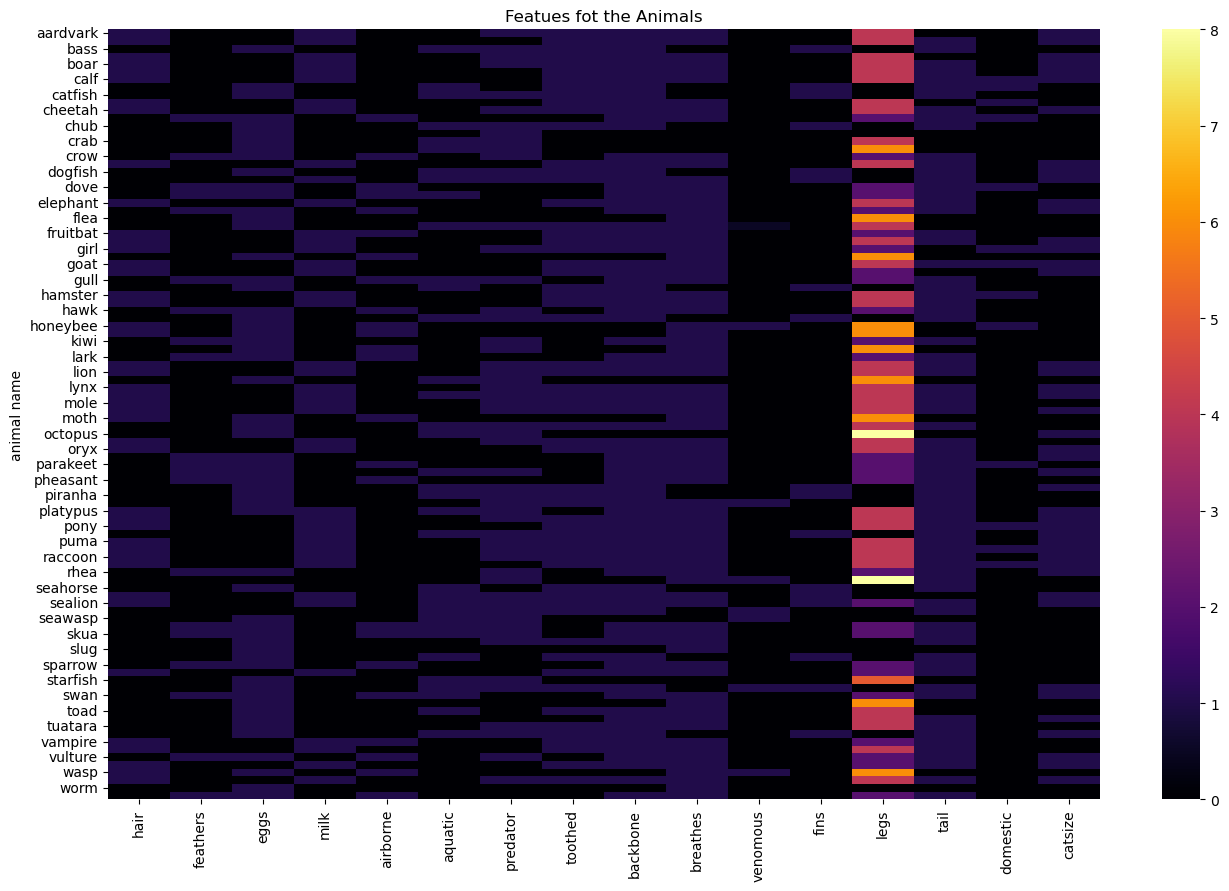

In [13]:
data_def = data.drop(['type'],axis=1)
data_df_temp = data_def.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(data_df_temp,cmap="inferno")
ax = plt.gca()
ax.set_title("Featues fot the Animals")

In [14]:
data.drop(['animal name'],axis =1,inplace=True)

In [15]:
x= data.drop('type',axis = 1)
y=data[['type']]

In [16]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=19)

In [19]:
x.shape,y.shape

((101, 16), (101, 1))

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80, 1), (21, 1))

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn,x_train,y_train,cv=3)
score.mean()

0.8741690408357075

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
score=cross_val_score(knn,x_train,y_train,cv=3)
score.mean()

0.7996201329534663

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)
score=cross_val_score(knn,x_train,y_train,cv=3)
score.mean()

0.7867996201329533

In [28]:
knn = KNeighborsClassifier(n_neighbors=11)
score=cross_val_score(knn,x_train,y_train,cv=3)
score.mean()

0.7867996201329533

In [29]:
knn = KNeighborsClassifier(n_neighbors=13)
score=cross_val_score(knn,x_train,y_train,cv=3)
score.mean()

0.7483380816714149

In [30]:
score = []
k_range=(i*2+1 for i in range(3,20,2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train,y_train,cv = 3)
    score.append(scores.mean())
score

[0.7996201329534663,
 0.7867996201329533,
 0.6989553656220323,
 0.5992402659069326,
 0.5992402659069326,
 0.5365622032288698,
 0.4501424501424502,
 0.4501424501424502,
 0.4501424501424502]

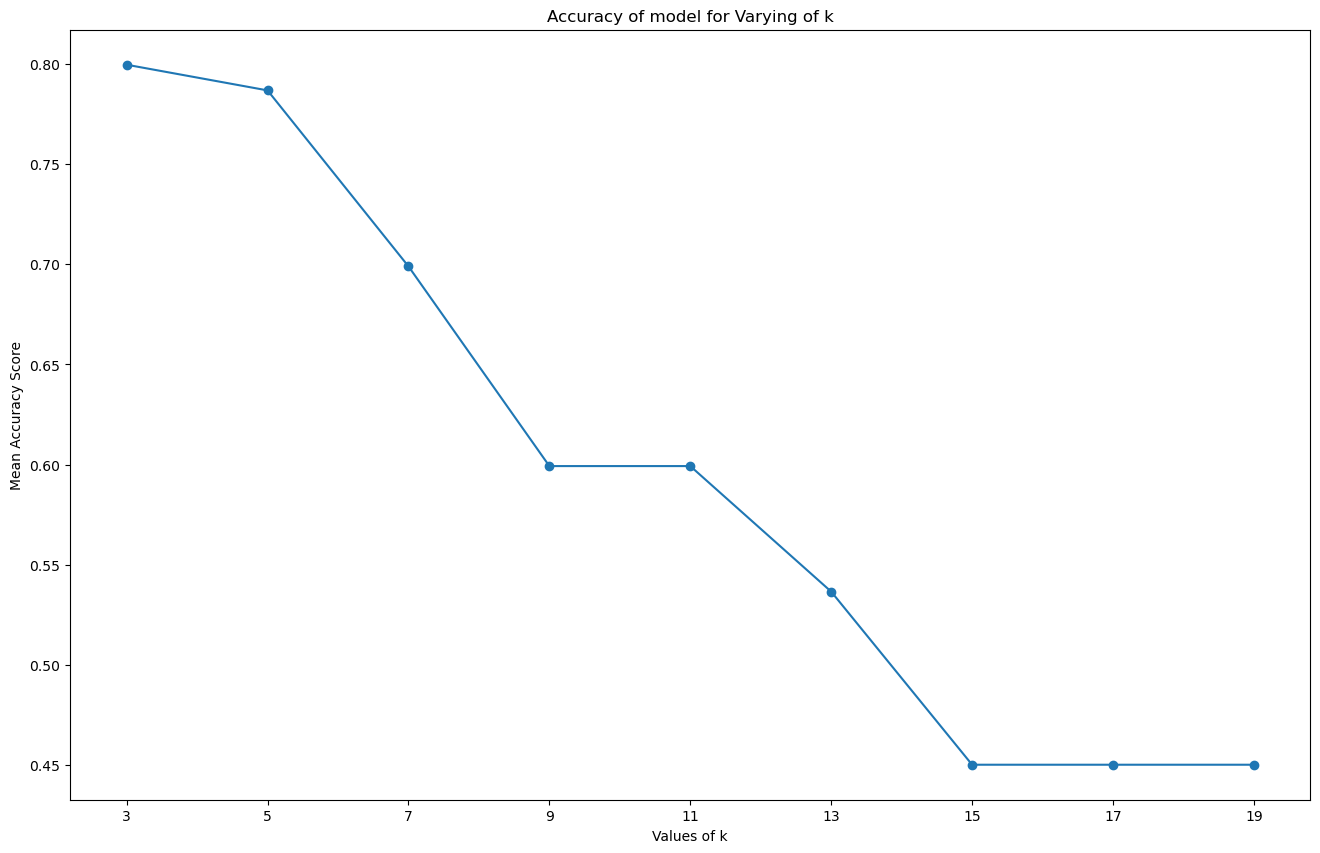

In [34]:
plt.plot(range(3,20,2),score,marker='o')

plt.title('Accuracy of model for Varying of k')
plt.xlabel('Values of k')
plt.ylabel('Mean Accuracy Score')
plt.xticks(range(3,20,2))
plt.rcParams['figure.figsize'] = (5,5)

plt.show()

# We will choose K=3 because it is giving us the best cross validation score

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score = cross_val_score(knn,x_train,y_train)
score.mean()

0.9

In [36]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.25      0.50      0.33         2
           4       1.00      1.00      1.00         5
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.81        21
   macro avg       0.61      0.64      0.62        21
weighted avg       0.79      0.81      0.79        21

